# Breast cancer prediction using KNN, RandomForest, DecisionTree and SVM algorithms 

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [8]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


In [9]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(classifier_data, y_test, score_type='all'):
    model_name = classifier_data['classifier'].__class__.__name__
    
    if score_type == 'recall':
        recall = recall_score(y_test, classifier_data['y_pred'])
        return recall 
    else :
        accuracy = round(accuracy_score(y_test, classifier_data['y_pred']), 2)
        precision = round(precision_score(y_test, classifier_data['y_pred']),2)
        recall = round(recall_score(y_test, classifier_data['y_pred']),2)
        f1 = round(f1_score(y_test, classifier_data['y_pred']), 2)
        auc = round(roc_auc_score(y_test, classifier_data['y_proba_positive']), 2)
        return pd.DataFrame({
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 score': f1,
            'AUC score': auc
        }, index=[model_name])


def plot_decision_areas(classifier, X_set, y_set):
    
    labels = ['Benign','Malignant']
    
    plt.figure(figsize=(10,6), dpi= 80)
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min(), stop = X_set.iloc[:, 0].max(), step = 0.1),
        np.arange(start = X_set.iloc[:, 1].min(), stop = X_set.iloc[:, 1].max(), step = 0.1))
    positions = [(0,0), (0,1), (1,0), (1,1)]

    # Loop on classifier 
    z = classifier['classifier'].predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
   # print(z.shape)
    plt.contourf(X1, X2, z,
                 alpha = 0.75, cmap = ListedColormap(('lightgreen', 'salmon')))

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j].iloc[:,0], X_set[y_set == j].iloc[:,1], color = ListedColormap(('orange', 'red'))(i), label = labels[j])

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.legend(title='Cancer type (test set)')
    plt.title(str(classifier['classifier'].__class__.__name__))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')

    plt.show() 

def get_predictions(classifier, X_test):
    classifier['y_pred'] = classifier['classifier'].predict(X_test)
    classifier['y_proba'] = classifier['classifier'].predict_proba(X_test)
    classifier['y_proba_positive'] = classifier['y_proba'][:,1]
    return classifier
    

In [10]:
model_list = []

<h4>1) kNN with n=5</h4> 

In [11]:
from sklearn.model_selection import train_test_split

X = features[['mean radius', 'mean texture']]
y = target['tumor type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_5 = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')}
knn_5['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

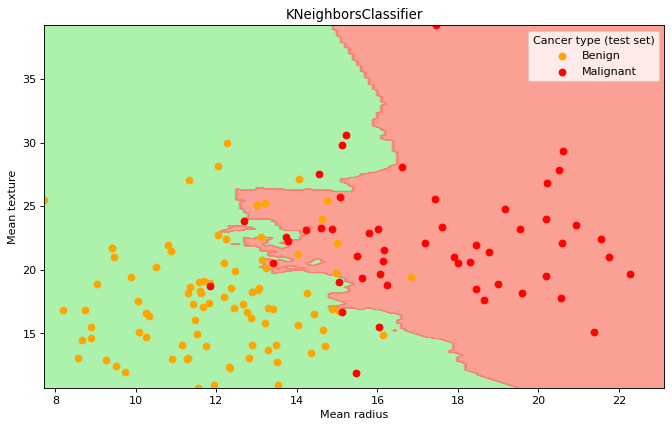

In [13]:
X_set = X_test
y_set = y_test
plot_decision_areas(knn_5, X_test, y_test)
model_list.append(knn_5)

<div style="height:20px;text-align_center"><hr/></div>

<h4>2) Exploring different values for optimizing k</h4>

In [14]:
best_score = 0
k=5
for i in range(1,50,2):
    knn = {'classifier': KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')}
    knn['classifier'].fit(X_train, y_train)
    knn = get_predictions(knn,X_test)
    recall = compute_metrics(knn, y_test, 'recall')
    if recall > best_score:
        best_score = recall
        k = i


In [15]:
print('kNN with value ',k,' gives us the best classifier with a recall of ',round(recall,2))

kNN with value  23  gives us the best classifier with a recall of  0.87


<div style="height:20px;text-align_center"><hr/></div>

<h4>3) kNN with n=23</h4>

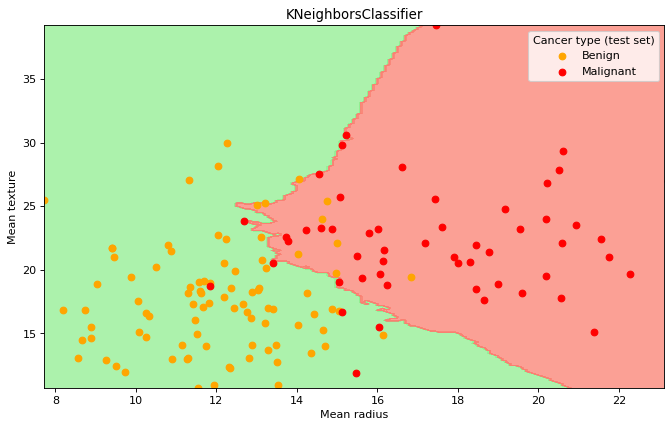

In [16]:
knn_23 = {'classifier': KNeighborsClassifier(n_neighbors = 23, metric = 'euclidean')}
knn_23['classifier'].fit(X_train, y_train)
plot_decision_areas(knn_23, X_test, y_test)
model_list.append(knn_23)

<div style="height:20px;text-align_center"><hr/></div>

<h4>4) Training a decision tree classifier</h4>

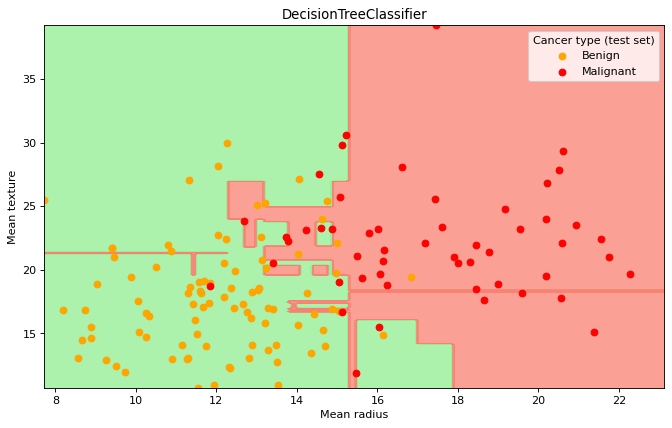

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt['classifier'].fit(X_train, y_train)
plot_decision_areas(dt, X_test, y_test)
model_list.append(dt)

<div style="height:20px;text-align_center"><hr/></div>

<h4>5) Optimal value for depth of decision tree</h4>

In [18]:
best_score = 0
max_depth=1
for i in range(1,dt['classifier'].tree_.max_depth+1):
    dt_check = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=i)}
    dt_check['classifier'].fit(X_train, y_train)
    dt_check = get_predictions(dt_check,X_test)
    recall = compute_metrics(dt_check, y_test, 'recall')
    if recall > best_score:
        best_score = recall
        max_depth = i

In [19]:
print('Decision tree with max depth of ',max_depth,' gives us the best classifier with a recall of ',round(recall,2))

Decision tree with max depth of  3  gives us the best classifier with a recall of  0.77


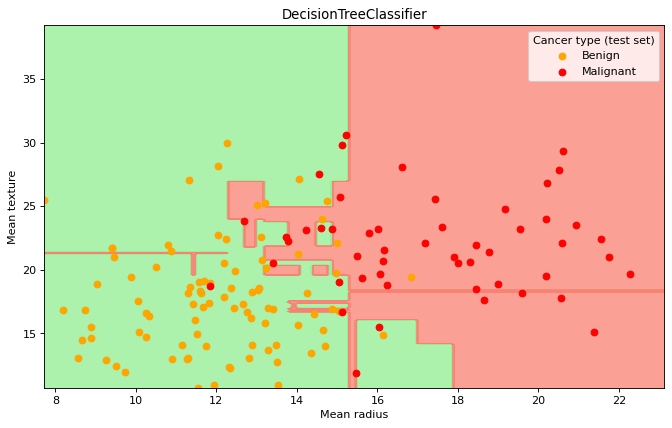

In [20]:
dt_3 = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)}
dt_3['classifier'].fit(X_train, y_train)
dt_3 = get_predictions(dt_check,X_test)
plot_decision_areas(dt_3, X_test, y_test)
model_list.append(dt_3)

<div style="height:20px;text-align_center"><hr/></div>

<h4>6) Training a random forest classifier</h4>

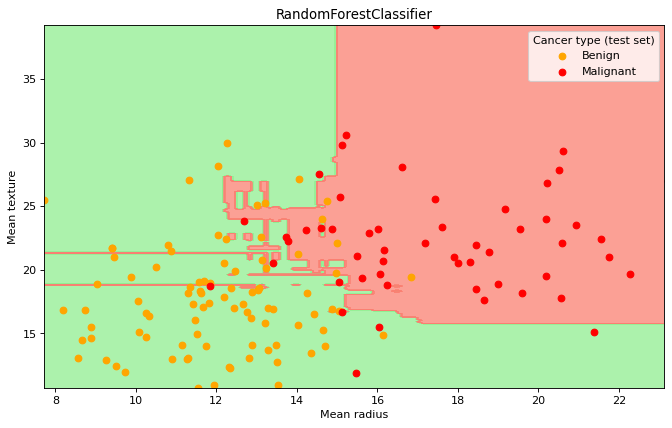

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = {'classifier': RandomForestClassifier(criterion = 'entropy', n_estimators = 5)}
rf['classifier'].fit(X_train, y_train)
plot_decision_areas(rf, X_test, y_test)
model_list.append(rf)

<div style="height:20px;text-align_center"><hr/></div>

<h4>7) Tuning the hyperparameters for the random forest classifier</h4>

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [i for i in range(10,20)],
    'criterion' : ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_tuned = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19]},
             verbose=2)

In [23]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 16}

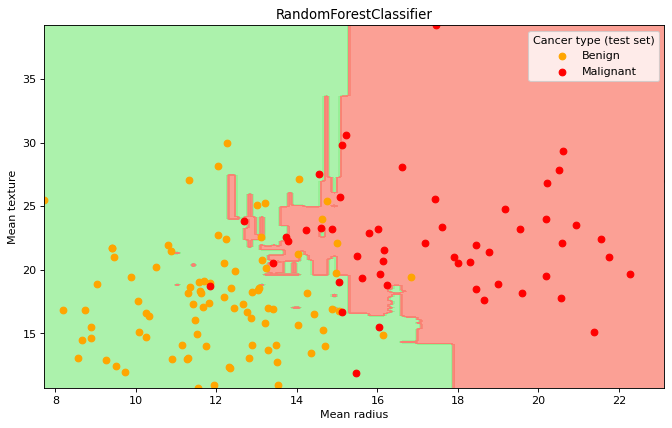

In [24]:
re_maximized = {'classifier': RandomForestClassifier(criterion = 'gini', n_estimators = 10, class_weight='balanced')}
re_maximized['classifier'].fit(X_train, y_train)
plot_decision_areas(re_maximized, X_test, y_test)
model_list.append(re_maximized)

<div style="height:20px;text-align_center"><hr/></div>

<h4>8) Training SVM with a linear kernel</h4>

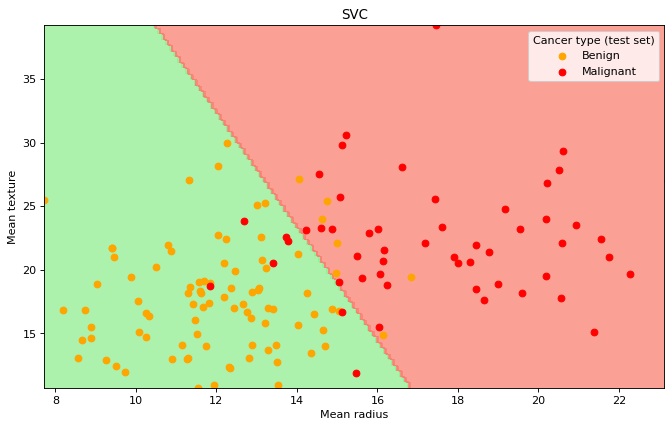

In [25]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)
plot_decision_areas(svm, X_test, y_test)
model_list.append(svm)

<div style="height:20px;text-align_center"><hr/></div>

<h4>9) Comparing accuracy of classifiers trained above</h4>

In [26]:
for model in model_list:
    model = get_predictions(model,X_test)
    model['metrics'] = compute_metrics(model, y_test)
pd.concat([model['metrics'] for model in model_list])

,Accuracy,Precision,Recall,F1 score,AUC score
KNeighborsClassifier,0.87,0.83,0.81,0.82,0.90
KNeighborsClassifier,0.91,0.87,0.89,0.88,0.96
DecisionTreeClassifier,0.85,0.82,0.77,0.80,0.84
DecisionTreeClassifier,0.85,0.82,0.77,0.80,0.84
RandomForestClassifier,0.85,0.80,0.77,0.79,0.89
RandomForestClassifier,0.87,0.84,0.81,0.83,0.93
SVC,0.90,0.87,0.87,0.87,0.97


<p> Using recall as our comparison metric, we can see from above that the kNN algorithm with k=23 would be the best classifier to use for predicting the cancer type</p>

<div style="height:20px;text-align_center"><hr/></div>

<h4>10) Best choice knn with k= 23 performance</h4>

In [27]:
print(model_list[2]['metrics'])

                        Accuracy  Precision  Recall  F1 score  AUC score
DecisionTreeClassifier      0.85       0.82    0.77       0.8       0.84
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=11; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=13; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=14; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=16; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=18; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=19; total time=   0.1s
[CV] END class_weight=balanced

[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=11; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=12; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=14; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=17; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=18; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=19; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=11; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_esti

[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=12; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=13; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=14; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=16; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=17; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=19; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=11; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_esti

[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=11; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=12; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=13; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=15; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=16; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=17; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=18; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=sqrt, n_esti